Tâche 8

- déterminer la bande interdite
- trouver la direction dans laquelle la dernière (première) bande de valence (conduction) présente le plus et le moins de dispersion (insérer une figure indiquant la dispersion par des flèches)
- calculer la masse effective au sommet (base) de la dernière (première) bande de valence (conduction) en supposant une dispersion parabolique

In [1]:
from matplotlib import pyplot as plt
from pymatgen.ext.matproj import MPRester
from pymatgen.symmetry.analyzer import SpacegroupAnalyzer
from pymatgen.electronic_structure.bandstructure import BandStructure
from pymatgen.electronic_structure.plotter import BSPlotter
import numpy as np
import matplotlib.pyplot as plt

In [2]:
with MPRester("2HJyrqCBxbcTKw7d") as m:
    structure = m.get_structure_by_material_id("mp-23209")    
    structureBand =  m.get_bandstructure_by_material_id("mp-23209") #donnée sur la bande de la structure


1) déterminer la bande interdite

est-ce une bande direct ? : False
C'est une bande : Indirect
Valeur de cette bande est : 5.2267eV
Vecteur de transition : X-\Gamma


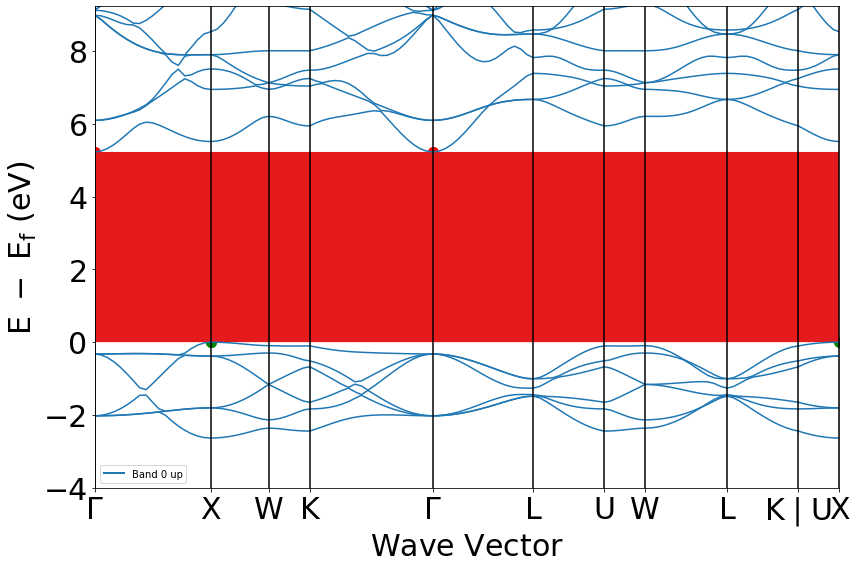

In [20]:
bplot = BSPlotter(structureBand)
bplot.get_plot(vbm_cbm_marker=True) #plot Structure de bande et densité d'états (marqueur de limite bande interdite)

bande = structureBand.get_band_gap()
donnees= bplot.bs_plot_data()
zero_energy = data.get("zero_energy")
b = donnees.get("band_gap")
d = donnees.get('ticks').get('distance')

plt.fill_between(np.linspace(0,d[-1],1000),donnees['vbm'][0][1],donnees['cbm'][0][1]) #plot la bande interdite


energie = str(bande['energy'])
vecteur = str(bande['transition'])
print("est-ce une bande direct ? :", bande["direct"])
print("C'est une bande : Indirect" )
print( "Valeur de cette bande est : " + energie + "eV")
print( "Vecteur de transition : " + vecteur)


2) trouver la direction dans laquelle la dernière (première) bande de valence (conduction) présente le plus et le moins de dispersion (insérer une figure indiquant la dispersion par des flèches)

In [7]:
print("Bandes contenant le max de la bande de valence :" , structureBand.get_vbm()['band_index'])
print("On prend comme bande de valence max : 13")
print("Bandes contenant le min de la bande de conduction :" ,structureBand.get_cbm()['band_index'])

Bandes contenant le max de la bande de valence : defaultdict(<class 'list'>, {<Spin.up: 1>: [11]})
On prend comme bande de valence max : 13
Bandes contenant le min de la bande de conduction : defaultdict(<class 'list'>, {<Spin.up: 1>: [12]})


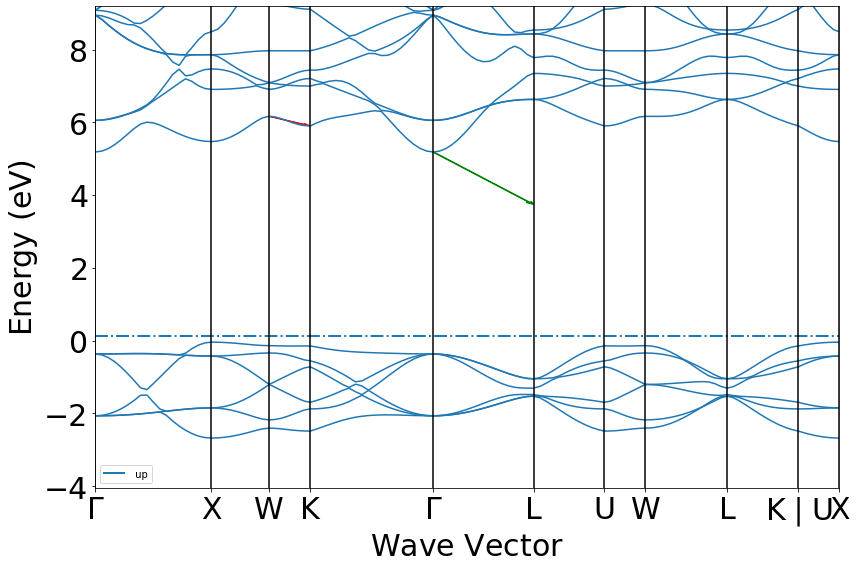

In [44]:
energy = donnees.get('energy').get("1")
E_0 = donnees.get('zero_energy')

for i in range(len(energy)):
    for j in range(len(energy[i])):
        if 0 in energy[i][j]: 
            valence_band_number = j

conduction_band_number = valence_band_number + 1
           
min_dis = np.Inf
max_dis = 0



distance = np.unique(d)

for i in range(len(energy)):
    energy_difference = np.abs(energy[i][conduction_band_number][-1]-energy[i][conduction_band_number][0])
    if energy_difference < min_dis : 
        min_dis = energy_difference
        start_min_dis = i
    if energy_difference > max_dis : 
        max_dis = energy_difference
        start_max_dis = i
bplot.get_plot(zero_to_efermi=False, bs_labels=[""])
plt.arrow(distance[start_min_dis],energy[start_min_dis][conduction_band_number][0]+E_0,distance[start_min_dis+1] - distance[start_min_dis],-min_dis, length_includes_head=True, color="red", width=0.01, head_width=0.05)
plt.arrow(distance[start_max_dis],energy[start_max_dis][conduction_band_number][0]+E_0,distance[start_max_dis+1] - distance[start_max_dis],-max_dis, length_includes_head=True, color="green", width=0.01, head_width=0.05)
plt.show()

3) calculer la masse effective au sommet (base) de la dernière (première) bande de valence (conduction) en supposant une dispersion parabolique

In [30]:
E_vbm = structureBand.get_vbm()['energy']
kpoint_vbm = structureBand.get_vbm()['kpoint'].cart_coords


cbm = structureBand.get_cbm()
E_cbm = cbm['energy']
kpoint_cbm = cbm['kpoint'].cart_coords

print('Energie du minimum de la bande de conduction = ',E_cbm,'eV')
print('sur le graphe : E-Ef = ', (E_cbm-E_0))
print('Vecteur k (coordonnées cartésiennes) =',kpoint_cbm)
print(cbm.get('band_index'))

h_bar = 6.5821e-16
m_electron = 9.11e-31
m_vbm = (h_bar**2 * (kpoint_vbm[0]**2+kpoint_vbm[1]**2+kpoint_vbm[2]**2))/(2*abs(E_vbm))
m_cbm = (h_bar**2 * (kpoint_cbm[0]**2+kpoint_cbm[1]**2+kpoint_cbm[2]**2))/(2*E_cbm)
print('La masse effective au sommet de la dernière bande de valence =', m_vbm, 'kg', '=',  m_vbm/m_electron, 'm_e')
print('La masse effective à la base de la première bande de conduction =', m_cbm, 'kg')


Energie du minimum de la bande de conduction =  5.1874 eV
sur le graphe : E-Ef =  5.2267
Vecteur k (coordonnées cartésiennes) = [0. 0. 0.]
defaultdict(<class 'list'>, {<Spin.up: 1>: [12]})
La masse effective au sommet de la dernière bande de valence = 4.381569899265954e-30 kg = 4.809626673178873 m_e
La masse effective à la base de la première bande de conduction = 0.0 kg
